In [20]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv("labels.csv")

In [22]:
df.head()

,image_id,patient_id,camera,nationality,patient_age,patient_sex,exam_eye,comorbidities,diabetes_time_y,insulin,...,vessels,macula,classifications,final_conclusion,DR_SDRG,DR_ICDR,focus,illumination,image_field,artifacts
0,img00001,1,Canon CR,Brazil,48.0,1,1,diabetes1,12,yes,...,1,1,0; 0; 0,1,0.0,0.0,1,1,1,1
1,img00002,1,Canon CR,Brazil,48.0,1,2,diabetes1,12,yes,...,1,1,12; 0; 0,2,0.0,0.0,1,1,1,1
2,img00003,2,Canon CR,Brazil,18.0,2,1,diabetes1,7,yes,...,1,1,0; 0; 0,1,0.0,0.0,1,1,1,1
3,img00004,2,Canon CR,Brazil,18.0,2,2,diabetes1,7,yes,...,1,1,0; 0; 0,1,0.0,0.0,1,1,1,1
4,img00005,3,Canon CR,Brazil,22.0,1,1,diabetes1,11,yes,...,1,1,0; 0; 0,1,0.0,0.0,1,1,1,1


In [23]:
df["DR_ICDR"].isna().sum()

762

In [24]:
df2 = df[df["DR_ICDR"].notna()] # drop nan in DR_ICDR
df2["DR_ICDR"].isna().sum()

0

In [25]:
df2["DR_ICDR"].value_counts()

0.0    14453
4.0      394
2.0      307
3.0      190
1.0      160
Name: DR_ICDR, dtype: int64

In [26]:
df2["label"] = df2["DR_ICDR"]
df2["label"].replace({2: 1, 3: 1, 4: 2}, inplace=True) # reclassification: Normal:0, NPDR:1, PDR:2
df2["label"].value_counts()

C:\Users\Jiheon Choi\AppData\Local\Temp\ipykernel_13364\1593505660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["label"] = df2["DR_ICDR"]
C:\Users\Jiheon Choi\AppData\Local\Temp\ipykernel_13364\1593505660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["label"].replace({2: 1, 3: 1, 4: 2}, inplace=True) # reclassification: Normal:0, NPDR:1, PDR:2


0.0    14453
1.0      657
2.0      394
Name: label, dtype: int64

In [27]:
df["patient_id"].nunique() # before drop

8524

In [28]:
df2["patient_id"].nunique() # after drop

8114

In [29]:
df3  = df2[["patient_id", "label"]] # select two columns: p_id, label

In [30]:
df4 = df3.groupby("patient_id").agg(['max']) # patient grouping 

In [31]:
df4

,label
,max
patient_id,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
8520,0.0
8521,0.0


In [32]:
dict4 = df4.to_dict("index")

dict5 = dict()
for k, v in dict4.items():
    dict5[k] = v[('label', 'max')]
dict5

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 1.0,
 12: 0.0,
 13: 1.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 1.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 2.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 1.0,
 37: 1.0,
 38: 1.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 1.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 1.0,
 48: 0.0,
 49: 0.0,
 50: 2.0,
 51: 1.0,
 52: 2.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 1.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 2.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 1.0,
 73: 1.0,
 74: 0.0,
 75: 2.0,
 76: 1.0,
 77: 0.0,
 78: 1.0,
 79: 0.0,
 80: 0.0,
 81: 1.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 2.0,
 86: 1.0,
 87: 0.0,
 88: 1.0,
 89: 0.0,
 90: 1.0,
 91: 0.0,
 92: 2.0,
 93: 0.0,
 94: 0.0,
 95: 0.0,
 96: 0.0,
 97: 1.0,
 98: 0.0,
 99: 0.0,
 100: 0.0,
 101: 0.

In [33]:
df5 = pd.DataFrame.from_dict(dict5, orient='index', columns=['label'])
df5

,label
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
8520,0.0
8521,0.0
8522,1.0
8523,0.0


In [34]:
## Custom function to stratified sampling/splitting
def get_dataset_partitions_pd(df, train_split=0.8, val_split=0.1, test_split=0.1, target_variable=None):
    assert (train_split + test_split + val_split) == 1
    
    # Only allows for equal validation and test splits
    assert val_split == test_split 

    # Shuffle
    df_sample = df.sample(frac=1, random_state=12)

    # Specify seed to always have the same split distribution between runs
    # If target variable is provided, generate stratified sets
    if target_variable is not None:
      grouped_df = df_sample.groupby(target_variable)
      arr_list = [np.split(g, [int(train_split * len(g)), int((1 - val_split) * len(g))]) for i, g in grouped_df]

      train_ds = pd.concat([t[0] for t in arr_list])
      val_ds = pd.concat([t[1] for t in arr_list])
      test_ds = pd.concat([v[2] for v in arr_list])

    else:
      indices_or_sections = [int(train_split * len(df)), int((1 - val_split) * len(df))]
      train_ds, val_ds, test_ds = np.split(df_sample, indices_or_sections)
    
    return train_ds, val_ds, test_ds

In [35]:
y = df5[['label']]
train_ds, val_ds, test_ds = get_dataset_partitions_pd(y, target_variable = 'label')

In [36]:
# custom function to check 
def _check(df_):

    n_rows = len(df_)

    ### basic number
    c_dict = df_.value_counts().to_dict()
    for k, v in c_dict.items():
        print(f"{k}: {100*(v/n_rows):.2f}% ({v})")
    # print(cip_dict)

    ### plot
    labels = []
    sizes = []

    for x, y in c_dict.items():
        labels.append(x)
        sizes.append(y)

    # Plot
    plt.pie(sizes, labels=labels)
    plt.axis('equal')
    plt.show()

train
(0.0,): 92.51% (6004)
(1.0,): 4.45% (289)
(2.0,): 3.04% (197)


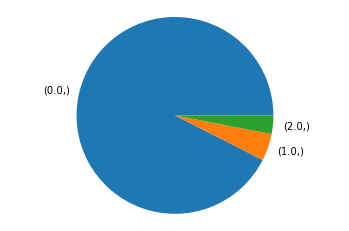

validation
(0.0,): 92.48% (750)
(1.0,): 4.44% (36)
(2.0,): 3.08% (25)


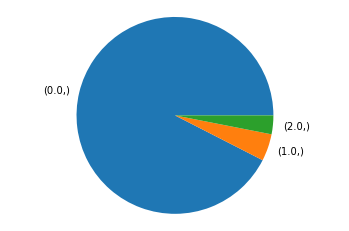

test
(0.0,): 92.37% (751)
(1.0,): 4.55% (37)
(2.0,): 3.08% (25)


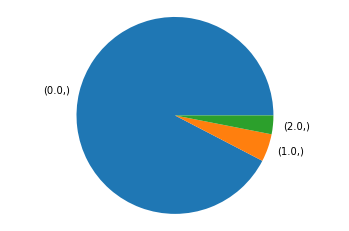

In [37]:
for n, df_ in enumerate([train_ds, val_ds, test_ds]):
    if n == 0:
        print("train")
    elif n ==1:
        print("validation")
    else:
        print("test")

    _check(df_)

In [38]:
train_list = list(train_ds.index.values)
train_list

[7141,
 4710,
 7827,
 3546,
 5175,
 62,
 4908,
 6023,
 6018,
 577,
 8221,
 7030,
 6469,
 5240,
 4374,
 5407,
 6987,
 6826,
 7492,
 7670,
 3908,
 1765,
 184,
 6030,
 6755,
 2487,
 1837,
 877,
 8165,
 2210,
 7957,
 1065,
 4074,
 7945,
 3975,
 2597,
 5197,
 5352,
 2944,
 2042,
 2762,
 5475,
 2513,
 7052,
 1003,
 2783,
 7312,
 1758,
 5602,
 3425,
 1654,
 6551,
 6402,
 6660,
 3868,
 7889,
 6319,
 6203,
 3126,
 8153,
 2267,
 1039,
 1932,
 2098,
 3184,
 3259,
 3644,
 2301,
 341,
 2534,
 2395,
 1628,
 7323,
 7965,
 5947,
 816,
 6837,
 1910,
 8225,
 8079,
 4787,
 4257,
 5502,
 2878,
 1594,
 3668,
 2015,
 6957,
 4147,
 2623,
 7461,
 5888,
 6400,
 3850,
 5630,
 3330,
 6538,
 7040,
 4566,
 6075,
 6926,
 5105,
 873,
 6824,
 2815,
 7204,
 5671,
 6841,
 6133,
 4178,
 130,
 1539,
 6756,
 5752,
 6387,
 8460,
 4249,
 4946,
 121,
 6914,
 5107,
 2934,
 6257,
 4704,
 7702,
 7148,
 2688,
 8289,
 5416,
 3132,
 5916,
 366,
 2463,
 6076,
 3143,
 6138,
 4434,
 6268,
 8326,
 6209,
 4767,
 2020,
 3031,
 7982,
 32

In [39]:
val_list = list(val_ds.index.values)
val_list

[6028,
 6717,
 4031,
 6093,
 5030,
 5004,
 7111,
 8217,
 3147,
 7161,
 7299,
 3853,
 4583,
 2354,
 5804,
 6239,
 2500,
 2770,
 703,
 4764,
 5503,
 3763,
 8473,
 7727,
 6280,
 5609,
 3238,
 3715,
 8385,
 5830,
 3337,
 2353,
 4547,
 1456,
 7763,
 5067,
 6788,
 4853,
 6464,
 7218,
 5806,
 151,
 1192,
 3903,
 2605,
 5389,
 971,
 8094,
 5388,
 7102,
 1488,
 7477,
 5950,
 5967,
 4891,
 4346,
 2524,
 2100,
 87,
 5895,
 7068,
 5055,
 2017,
 6504,
 4119,
 4235,
 6662,
 2512,
 6107,
 6437,
 5444,
 722,
 6161,
 172,
 238,
 157,
 3801,
 2559,
 6860,
 2112,
 7448,
 5568,
 8455,
 8283,
 4254,
 4400,
 5729,
 3137,
 6808,
 6480,
 4613,
 6081,
 6642,
 1988,
 2118,
 4299,
 6431,
 2870,
 5066,
 7856,
 2076,
 2476,
 1036,
 7342,
 4647,
 827,
 3793,
 3334,
 6186,
 2405,
 5529,
 5515,
 7064,
 2889,
 2460,
 4493,
 3586,
 6789,
 1484,
 3978,
 5982,
 206,
 3744,
 5220,
 423,
 4475,
 4630,
 7918,
 2696,
 2586,
 6819,
 8503,
 8161,
 6398,
 3349,
 3104,
 6754,
 3741,
 7445,
 7559,
 26,
 1575,
 4786,
 2898,
 3730,

In [40]:
test_list = list(test_ds.index.values)
test_list

[6570,
 7779,
 7082,
 5361,
 2719,
 3023,
 7711,
 70,
 3264,
 1927,
 479,
 2768,
 2603,
 1902,
 1622,
 2566,
 5419,
 3067,
 7745,
 2529,
 6111,
 3703,
 8043,
 5038,
 7035,
 2263,
 2980,
 5966,
 8146,
 4312,
 1031,
 1349,
 8504,
 7563,
 1987,
 7976,
 1865,
 4620,
 6556,
 418,
 4676,
 3516,
 5224,
 5001,
 6599,
 3751,
 2308,
 7073,
 373,
 2834,
 2423,
 6126,
 6097,
 35,
 6885,
 6861,
 4792,
 883,
 5593,
 2185,
 2450,
 2155,
 5803,
 711,
 3476,
 4305,
 8065,
 5861,
 6380,
 4121,
 3374,
 7686,
 3618,
 935,
 2002,
 1194,
 6810,
 8256,
 6124,
 4011,
 5522,
 753,
 3014,
 4856,
 1406,
 6038,
 5020,
 8031,
 7858,
 96,
 6496,
 5727,
 5871,
 278,
 3902,
 3304,
 1196,
 3082,
 4575,
 4292,
 4084,
 2574,
 3240,
 4930,
 3060,
 7625,
 1019,
 2459,
 2838,
 8028,
 4797,
 5367,
 8339,
 3135,
 1506,
 4769,
 8338,
 3462,
 7170,
 7598,
 2984,
 6769,
 8369,
 7390,
 7233,
 1450,
 4845,
 1307,
 3528,
 140,
 7281,
 4132,
 435,
 4122,
 200,
 4055,
 5869,
 7069,
 3844,
 2091,
 7103,
 3204,
 7812,
 3874,
 3588,
 1